<a href="https://colab.research.google.com/github/adesrimeilani/Pemrograman_Python/blob/main/ADE%20SRI%20MEILANI.%20M__1101184057_TT-42-07_TUGAS%20BESAR%20SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ade Sri Meilani M.

Nim : 1101184057

Kelas : TT-42-07

Skenario Perancangan FTTB

Jadi, skenario perancangan FTTB yang akan saya buat yaitu dari Sentral kemudian ke ODC lalu ke ONU lanjut ke ODP dan yang terakhir ke Roset. Di kota Makassar terdapat salah satu Hotel Claro Makassar, hotel ini memiliki 16 lantai, setiap lantai terdapat 10 kamar. Jadi, rencangan ini saya akan menggunakan Jenis Fiber G652D dengan panjang gelombang 1550 nm dengan redaman 0.2 dB/Km, dan akan menggunakan 4 konektor dan 2 spliter, dengan menggunakan spliter 1:32 dengan redaman 18.5 dB, lanjut untuk ONU ke ODP dengan menggunakan spliter 1:16 dengan redaman 15 dB untuk ODP ke Roset.Selain itu, dengan jumlah konektor terdapat 4 dan spliter 2, maka splicer ada 6 buah yang memiliki redaman 0.2 dB.









In [128]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [129]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.8 
SM = 6   
M = -0.23
q = 1.6*10**-19
id = 90*10**-9 
B = 8*10**9 
F = 1 
K = 1.38*10**-23
T = 300 
RL = 50 

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> 5*16 = 80 m 
#jarak total = 20000 + 80 = 20080 m

d = np.arange(0.80,20.081,1) #Jarak (km)
L_fiber = 0.2 #berdasarkan jenis G625D (dB)  
N_splicer = 6 #Jumlah Splicer
L_splicer = 0.2 #Loss dari splicer (db)
N_connector = 4 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 15 + 18.5 
Pt = 2 #Daya tx (dBm)

In [130]:
#RUMUS PR
def P_receive():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-40.06 -40.26 -40.46 -40.66 -40.86 -41.06 -41.26 -41.46 -41.66 -41.86
 -42.06 -42.26 -42.46 -42.66 -42.86 -43.06 -43.26 -43.46 -43.66 -43.86]


In [131]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [7.89023589e-05 7.53511677e-05 7.19598065e-05 6.87210817e-05
 6.56281235e-05 6.26743714e-05 5.98535600e-05 5.71597061e-05
 5.45870955e-05 5.21302715e-05 4.97840228e-05 4.75433727e-05
 4.54035684e-05 4.33600712e-05 4.14085466e-05 3.95448550e-05
 3.77650433e-05 3.60653364e-05 3.44421288e-05 3.28919777e-05]


In [132]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [3.29333300e-10 3.00355539e-10 2.73927508e-10 2.49824856e-10
 2.27842977e-10 2.07795264e-10 1.89511534e-10 1.72836573e-10
 1.57628828e-10 1.43759200e-10 1.31109948e-10 1.19573694e-10
 1.09052505e-10 9.94570666e-11 9.07059228e-11 8.27247848e-11
 7.54459004e-11 6.88074790e-11 6.27531666e-11 5.72315682e-11]


In [133]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[20.92705446 20.52783963 20.12858959 19.72930592 19.32999012 18.93064363
 18.53126781 18.13186399 17.73243341 17.33297727 16.93349672 16.53399285
 16.1344667  15.73491927 15.33535152 14.93576435 14.53615864 14.13653522
 13.73689487 13.33723837]


In [134]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[5.56317507 5.31327123 5.07457276 4.84657905 4.62881166 4.42081342
 4.22214744 4.03239627 3.851161   3.6780605  3.51273057 3.35482327
 3.20400614 3.05996154 2.92238601 2.79098962 2.66549539 2.5456387
 2.43116675 2.32183804]


In [135]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[2.65424342e-06 9.86734905e-06 3.25587801e-05 9.63567997e-05
 2.58217065e-04 6.32055471e-04 1.42443206e-03 2.97708548e-03
 5.80864863e-03 1.06441972e-02 1.84202288e-02 3.02553587e-02
 4.73832169e-02 7.10521310e-02 1.02403841e-01 1.42348533e-01
 1.91454636e-01 2.49869103e-01 3.17278269e-01 3.92912520e-01]


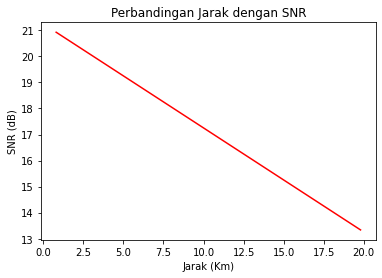

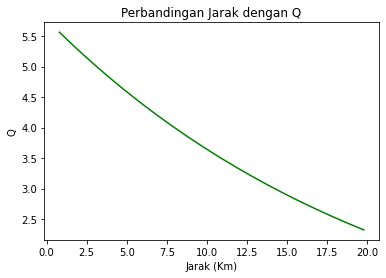

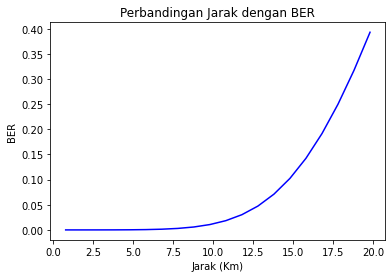

In [136]:
#GRAFIK
def grafik_pertama():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_kedua():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_ketiga():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_pertama()
grafik_kedua()
grafik_ketiga()